In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [ ]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
y_train[3]

1

In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, input_shape = (784,)))

In [ ]:
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))

In [ ]:
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1195018 (4.56 MB)
Trainable params: 119501

In [ ]:
model.compile(
    optimizer = "adam",
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
!nvidia-smi

Wed Jan 24 08:19:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0              27W /  70W |    119MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
Epochs = 20
Batch_size = 64

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = Epochs,
    batch_size = Batch_size,
    shuffle = True,
    validation_split = 0.3
)

Epoch 1/20
657/657 [==============================] - 7s 5ms/step - loss: 0.1201 - accuracy: 0.7508 - val_loss: 0.0474 - val_accuracy: 0.9233
Epoch 2/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0387 - accuracy: 0.9368 - val_loss: 0.0354 - val_accuracy: 0.9431
Epoch 3/20
657/657 [==============================] - 4s 5ms/step - loss: 0.0265 - accuracy: 0.9570 - val_loss: 0.0252 - val_accuracy: 0.9585
Epoch 4/20
657/657 [==============================] - 3s 4ms/step - loss: 0.0204 - accuracy: 0.9671 - val_loss: 0.0233 - val_accuracy: 0.9616
Epoch 5/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0159 - accuracy: 0.9744 - val_loss: 0.0229 - val_accuracy: 0.9636
Epoch 6/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0131 - accuracy: 0.9785 - val_loss: 0.0209 - val_accuracy: 0.9658
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0105 - accuracy: 0.9828 - val_loss: 0.0221 - val_accuracy: 0.9658
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

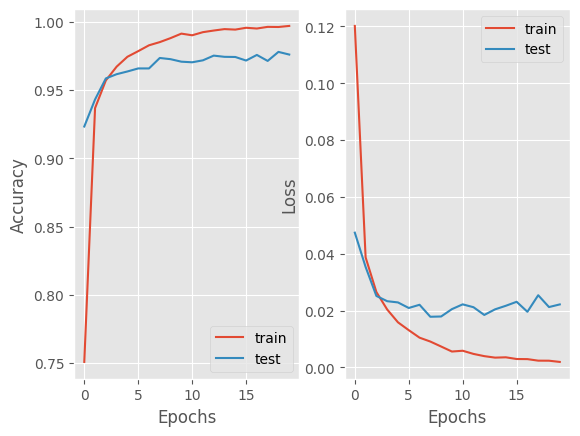

In [ ]:
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
!mkdir -p models

In [ ]:
!ls models

In [ ]:
filepath = "models/MNIST_1.h5"

In [ ]:
model.save(filepath)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls models

MNIST_1.h5


In [ ]:
model_load = tf.keras.models.load_model(filepath)

In [ ]:
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1195018 (4.56 MB)
Trainable params: 119501

In [ ]:
prediction = model_load.predict(x_test[:10])

1/1 [==============================] - 0s 105ms/step


In [ ]:
pred = np.argmax(prediction, axis=1)

In [ ]:
print(pred)

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
act = np.argmax(y_test[:10],axis = 1)

In [ ]:
print(act)

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
score = model_load.evaluate(x_test,y_test,return_dict = True)

313/313 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9796


In [ ]:
print(score)

{'loss': 0.019363241270184517, 'accuracy': 0.9796000123023987}
